In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
house= pd.read_csv('kc_house_data.csv')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house = house.drop(['id','date','zipcode','bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_built','yr_renovated','lat','long'],axis=1)
house.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,1180,5650,1180,0,1340,5650
1,538000.0,2570,7242,2170,400,1690,7639
2,180000.0,770,10000,770,0,2720,8062
3,604000.0,1960,5000,1050,910,1360,5000
4,510000.0,1680,8080,1680,0,1800,7503


In [6]:
house.isnull().sum()

price            0
sqft_living      0
sqft_lot         0
sqft_above       0
sqft_basement    0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
house.describe()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,1.510697e+04,1788.390691,291.509045,1986.552492,12768.455652
std,3.671272e+05,918.440897,4.142051e+04,828.090978,442.575043,685.391304,27304.179631
min,7.500000e+04,290.000000,5.200000e+02,290.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,1427.000000,5.040000e+03,1190.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,1910.000000,7.618000e+03,1560.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,2550.000000,1.068800e+04,2210.000000,560.000000,2360.000000,10083.000000
max,7.700000e+06,13540.000000,1.651359e+06,9410.000000,4820.000000,6210.000000,871200.000000


In [8]:
house.shape

(21613, 7)

In [9]:
house.columns

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   sqft_living    21613 non-null  int64  
 2   sqft_lot       21613 non-null  int64  
 3   sqft_above     21613 non-null  int64  
 4   sqft_basement  21613 non-null  int64  
 5   sqft_living15  21613 non-null  int64  
 6   sqft_lot15     21613 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 1.2 MB


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


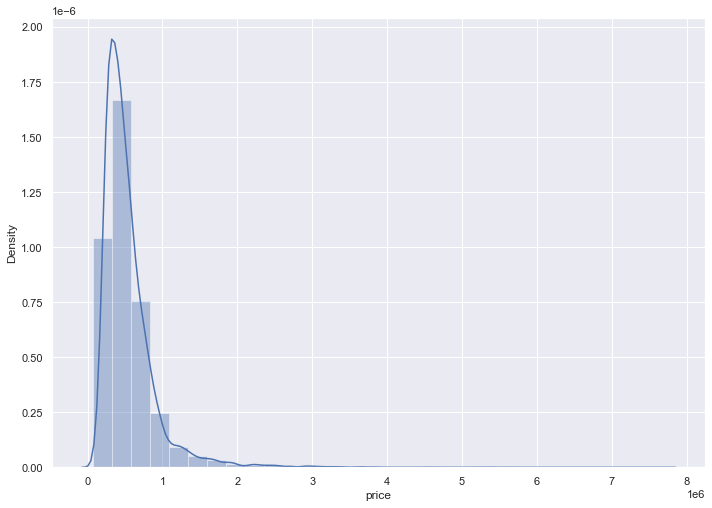

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(house['price'], bins=30)
plt.show()D

<AxesSubplot:>

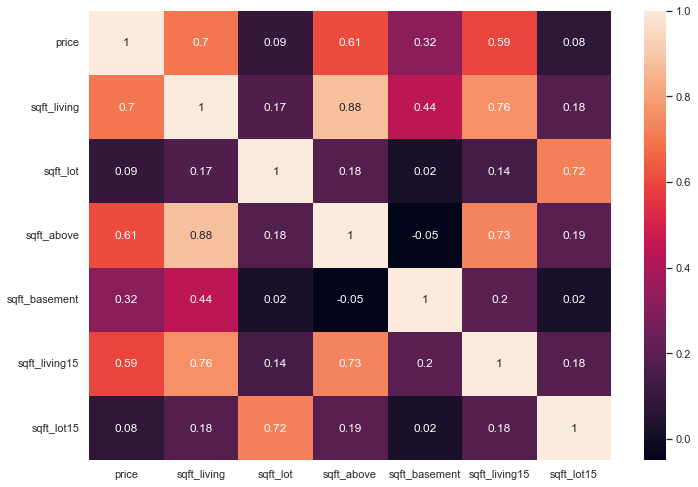

In [12]:
correlation_matrix = house.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [14]:
prices = house['price']
features = house.drop(['price'],axis=1)
features.shape

(21613, 6)

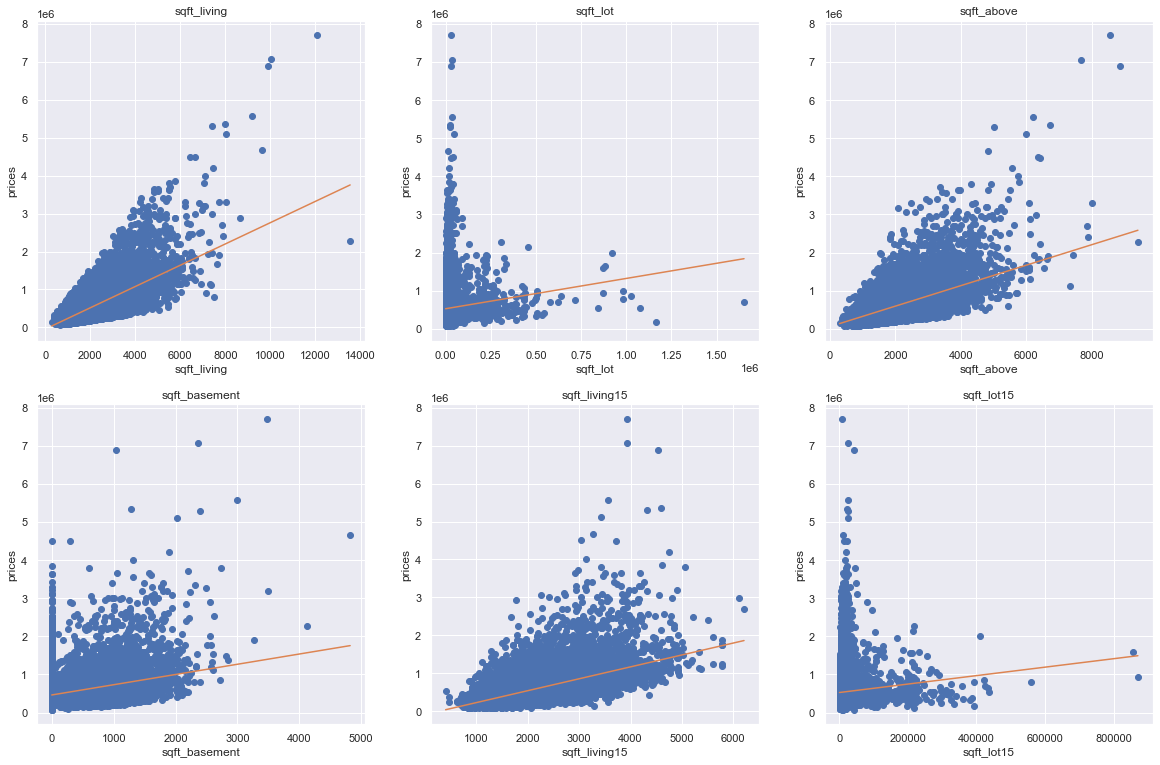

In [16]:
plt.figure(figsize=(20, 20))
# i: index
for i, col in enumerate(features.columns):
    plt.subplot(3, 3, i+1)
    x = features[col]
    y = prices
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,prices,test_size=0.20,random_state=10)

In [18]:
# Check if split is actually correct
# We can see it's roughly 80% train and 20% train
# So we can proceed!
print(features.shape[0])
print(float(x_train.shape[0]) / float(features.shape[0]))
print(float(x_test.shape[0]) / float(features.shape[0]))

21613
0.7999814926201823
0.2000185073798177


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression()

In [20]:
price_pred = lin_model.predict(x_test)
Mse = mean_squared_error(y_test,price_pred)
acc = lin_model.score(x_test,y_test)
print('slop', lin_model.coef_)
print("Intercept", lin_model.intercept_)
print("MSE", Mse)S
print('Accuracy',acc)

slop [ 1.59263699e+02  5.16862735e-02  6.39503411e+01  9.53133574e+01
  8.95201547e+01 -7.58065054e-01]
Intercept -102452.92714246607
MSE 71933554160.87949
Accuracy 0.5076226782012139
